## Code with KNN classifier after applying LDA:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import decomposition
from sklearn import datasets


In [3]:
df = pd.read_csv("iris.csv")

In [6]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['species']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
y=y.ravel()

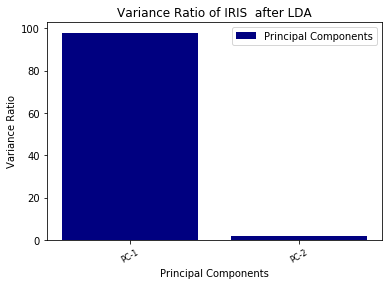

In [7]:
plt.bar([1,2],[97.876206, 1.751013],label='Principal Components',color='navy')
plt.legend()
plt.xlabel('Principal Components')
plt.xticks([1,2],['PC-1','PC-2'], fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of IRIS  after LDA')
plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
reduced_data = lda.fit(x,y).transform(x)
principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1', 'PC-2'])
# Adding lables
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
# Plotting pc1 & pc2


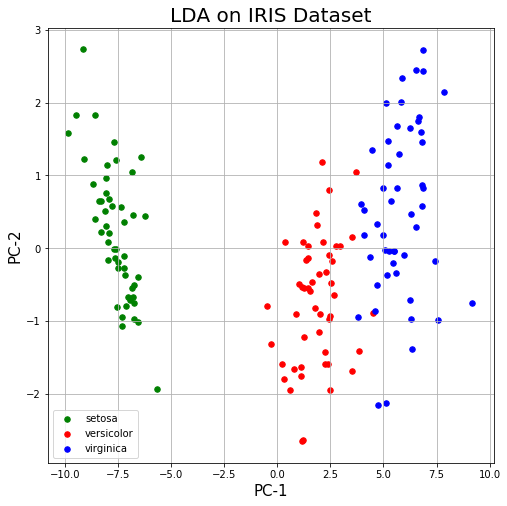

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-1', fontsize = 15)
ax.set_ylabel('PC-2', fontsize = 15)
ax.set_title('LDA on IRIS Dataset', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC-1']
               , finalDf.loc[indicesToKeep, 'PC-2']
               , c = color
               , s = 30)
ax.legend(targets)
ax.grid()
plt.show() 

In [13]:
finalDf.to_csv('iris_after_LDA.csv')

In [15]:
df = pd.read_csv("iris_after_LDA.csv")
#df.to_csv('iris.csv')
from sklearn.preprocessing import StandardScaler

features = ['PC-1', 'PC-2']
# Separating out the features
X = df.loc[:, features].values
# Separating out the target
Y = df.loc[:,['species']].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
y_train=y_train.ravel()
y_test=y_test.ravel()
#classifier.fit(X_train, y_train.squeeze())

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat = model.predict(X_test)

from sklearn import metrics
#acc = metrics.accuracy_score(Yhat, y_test)
#print(acc)
print('*'*11,'Accuracy of IRIS Dataset after PCA','*'*11,'\n')
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print ("Accuracy is ", metrics.accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

*********** Accuracy of IRIS Dataset after PCA *********** 

Accuracy is  97.77777777777777 % for K-Value: 1
Accuracy is  97.77777777777777 % for K-Value: 2
Accuracy is  95.55555555555556 % for K-Value: 3
Accuracy is  95.55555555555556 % for K-Value: 4
Accuracy is  95.55555555555556 % for K-Value: 5
Accuracy is  97.77777777777777 % for K-Value: 6
Accuracy is  100.0 % for K-Value: 7
Accuracy is  100.0 % for K-Value: 8
Accuracy is  100.0 % for K-Value: 9
Accuracy is  100.0 % for K-Value: 10
Accuracy is  100.0 % for K-Value: 11
Accuracy is  100.0 % for K-Value: 12
Accuracy is  100.0 % for K-Value: 13
Accuracy is  100.0 % for K-Value: 14
Accuracy is  100.0 % for K-Value: 15
Accuracy is  100.0 % for K-Value: 16
Accuracy is  100.0 % for K-Value: 17
Accuracy is  100.0 % for K-Value: 18
Accuracy is  100.0 % for K-Value: 19
Accuracy is  100.0 % for K-Value: 20
Accuracy is  100.0 % for K-Value: 21
Accuracy is  100.0 % for K-Value: 22
Accuracy is  100.0 % for K-Value: 23
Accuracy is  100.0 % for 

### we can see the improvement in accuracy when we process our dataset with LDA